In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [5]:
df.variety.value_counts()

Setosa        50
Virginica     50
Versicolor    50
Name: variety, dtype: int64

In [6]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [7]:
df.loc[df.variety == "Virginica"]["sepal.length"].mean()

6.587999999999998

In [8]:
filter = (df.variety == "Virginica")

df[filter]["sepal.length"].mean()

6.587999999999998

In [9]:
df["sepal_area"] = df["sepal.length"] * df["sepal.width"] 
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal_area
0,5.1,3.5,1.4,0.2,Setosa,17.85
1,4.9,3.0,1.4,0.2,Setosa,14.70
2,4.7,3.2,1.3,0.2,Setosa,15.04
3,4.6,3.1,1.5,0.2,Setosa,14.26
4,5.0,3.6,1.4,0.2,Setosa,18.00


In [10]:
df["petal_area"] = df["petal.length"] * df["petal.width"]

In [11]:
df[["sepal_area","petal_area"]].describe()

,sepal_area,petal_area
count,150.000000,150.000000
mean,17.822867,5.794067
std,3.361854,4.712390
min,10.000000,0.110000
25%,15.660000,0.420000
50%,17.660000,5.615000
75%,20.325000,9.690000
max,30.020000,15.870000


In [12]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,Setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Setosa,18.00,0.28


In [13]:
df[["sepal_area"]].groupby(df["variety"]).mean()

,sepal_area
variety,
Setosa,17.2578
Versicolor,16.5262
Virginica,19.6846


# **Visualization**

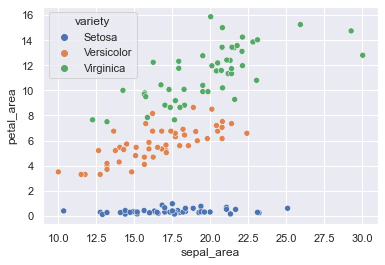

In [14]:
sns.scatterplot(x = "sepal_area", hue = "variety", y = "petal_area", data = df)
plt.show()

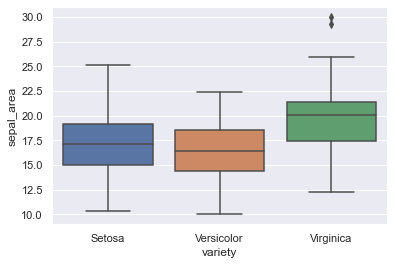

In [15]:
sns.boxplot(x = "variety", y="sepal_area", data = df)
plt.show()

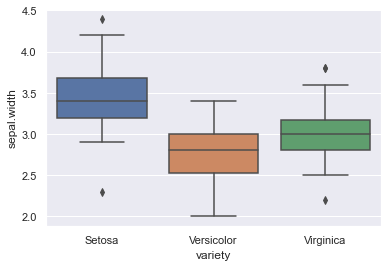

In [16]:
sns.boxplot(x = "variety", y="sepal.width", data = df)
plt.show()

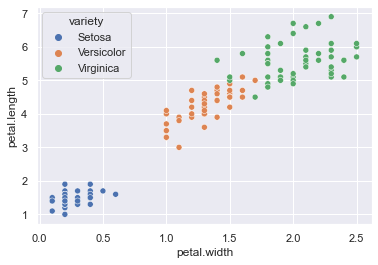

In [17]:
sns.scatterplot(x ="petal.width",hue = "variety", y = "petal.length", data = df)
plt.show()

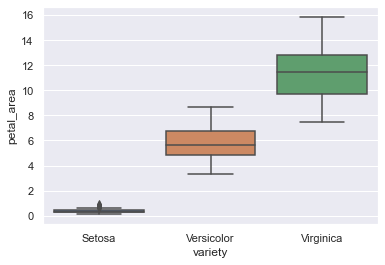

In [18]:
sns.boxplot(x = "variety", y="petal_area", data = df)
plt.show()

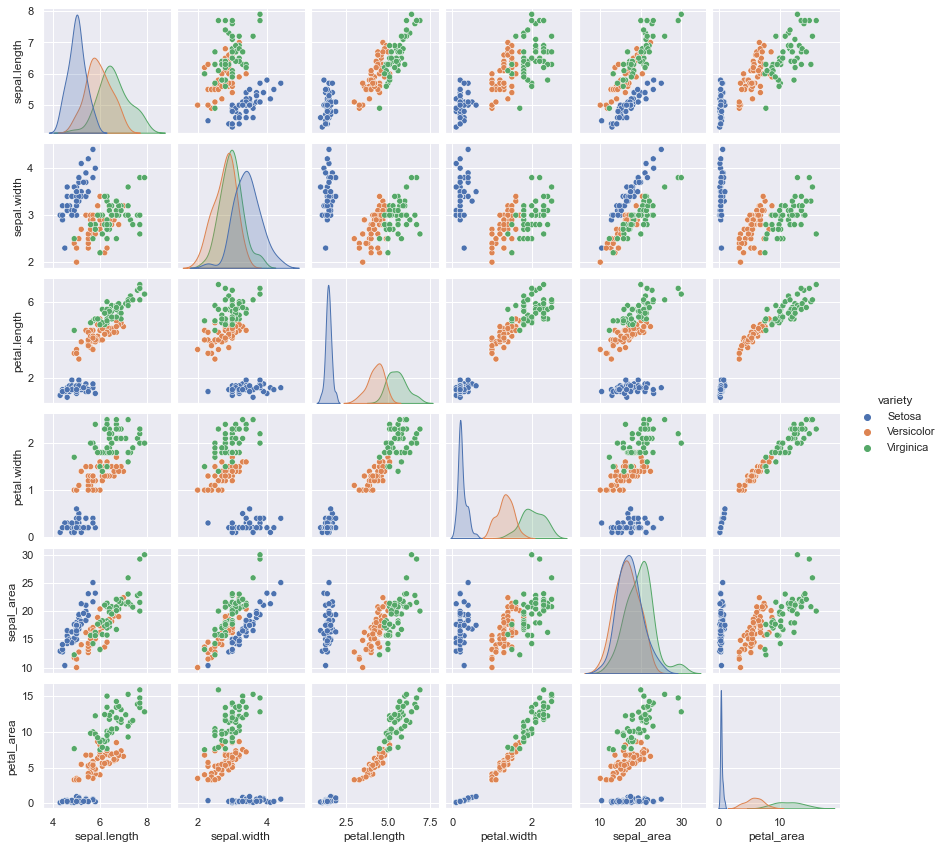

In [19]:
sns.pairplot(df, hue = "variety", height=2)
plt.show()

<AxesSubplot:xlabel='petal.width', ylabel='Density'>

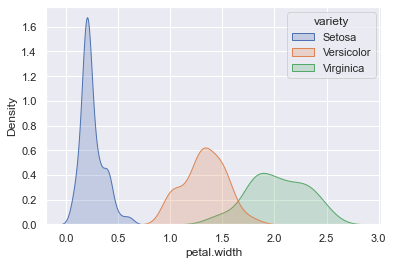

In [20]:
sns.kdeplot(df["petal.width"],hue =df["variety"], shade=True)

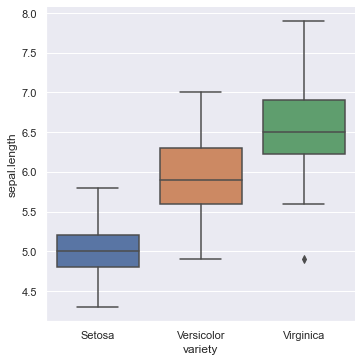

In [21]:
sns.catplot(x = "variety", y = "sepal.length", data=df, kind="box")
plt.show()

Text(0.5, 1.0, 'Varieties')

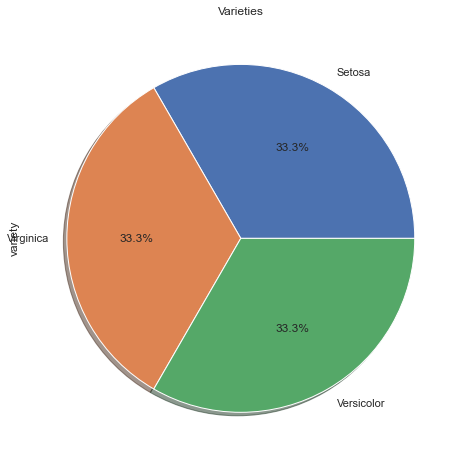

In [22]:
df.variety.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Varieties")

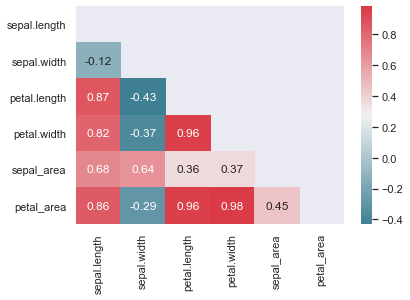

In [23]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(6, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask, cmap=cmap, ax=ax);

## **Outlier Analysis**

In [24]:
def outlier_find(column,df):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1

  upper_level = Q3 + 1.5*IQR
  lower_level = Q1 - 1.5*IQR

  outliers = len(df[(df[column] > upper_level) | (df[column] < lower_level)])

  print(column, "---> ", outliers)

In [25]:
cols = ["sepal.length","sepal.width","petal.length","petal.width"]

print("--- Number of Outliers ---")
for col in cols:
  outlier_find(col, df)

--- Number of Outliers ---
sepal.length --->  0
sepal.width --->  4
petal.length --->  0
petal.width --->  0


# **Modelling**

In [26]:
df["variety"] = df.variety.replace({"Setosa":0,
                                    "Virginica":1,
                                    "Versicolor":2})
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,0,17.85,0.28
1,4.9,3.0,1.4,0.2,0,14.70,0.28
2,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5.0,3.6,1.4,0.2,0,18.00,0.28


### **Train Test Split**

In [27]:
X = df.drop(["variety"], axis = 1)
y = df["variety"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

## **Logistic Regression**

In [28]:
logistic = LogisticRegression(max_iter=1000).fit(X_train, y_train)

y_pred = logistic.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.9811320754716981

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        17

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



<AxesSubplot:>

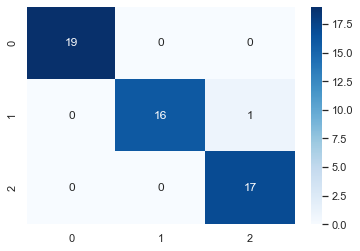

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,cmap='Blues')

## **Decision Tree**

In [32]:

cart = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = cart.predict(X_test)

accuracy_score(y_test, y_pred)    

1.0

<AxesSubplot:>

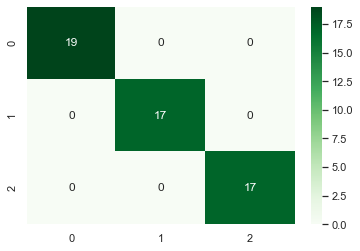

In [33]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap="Greens")